In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio

In [2]:
ARQUIVO_EXCEL = "dados_fourier.xlsx" # Chamando o arquivo excel com dados experimentais obtido no site Home Distiller
NOME_DA_PLANILHA_O = "dados (1)" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 1] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df = pd.read_excel( # Criando o Data Frame do diagrama de fases da mistura escolhida (etanol + água)
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df.head()

,x,y
0,0.032745,1.441031
1,0.101107,1.526448
2,0.164586,1.612824
3,0.228065,1.701760
4,0.286661,1.784937


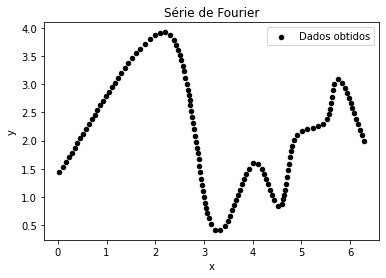

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
df.plot('x','y',legend=True, label = "Dados obtidos", ax=ax1, kind = 'scatter', color = 'black') # Plotando os dados
plt.title('Série de Fourier') # Definindo título do gráfico
plt.xlabel('x') # Definindo legendas dos eixos
plt.ylabel('y')
plt.show() # Plotando o diagrama de fases da mistura escolhida (etanol + água)

In [4]:
ORDEM =5

## Abordagem por mínimos quadrados

In [5]:
def matriz_X(x, ordem):
    n_linhas = len(x)
    n_colunas = 1 + 2*ordem
    X = np.zeros([n_linhas, n_colunas])
    for i in range(n_linhas):
        for j in range(n_colunas):
            if j == 0:
                X[i][j] = 1/2
                
            else:
                if (j+1) % 2 == 0:
                    X[i][j] = np.cos(((j+1)/2)*x[i])
                else:
                    X[i][j] = np.sin((j/2)*x[i])
                    
    return X

In [6]:
def coefs_qm(df, ordem):
    
    x = df['x']
    y = np.array(df['y'])
    
    X = matriz_X(x, ordem)
    Xt = np.transpose(X)
    XtX = Xt @ X
    invXtX = np.linalg.inv(XtX)
    invXtXXt = invXtX @ Xt
    
    y = np.array(df['y'])
    b = invXtXXt @ y
    
    return b

In [7]:
def plot_fourier(df, b, ordem):
    x = df['x']
    y = np.array(df['y'])
    
    xr = np.linspace(min(x), max(x), 100)
    
    n_ordem = 1 + 2*ordem
    for j in range(n_ordem):
        if j == 0:
            yr = (1/2)*b[j]
            
        else:
            if (j+1) % 2 == 0:
                yr += b[j]*np.cos(((j+1)/2)*xr)
            else:
                yr += b[j]*np.sin((j/2)*xr)
                
    return xr, yr

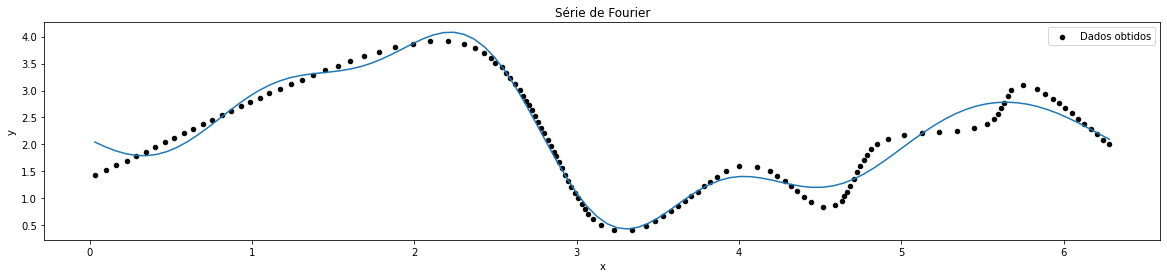

In [8]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)

b = coefs_qm(df, ORDEM)
xr1, yr1 = plot_fourier(df, b, ORDEM)
            
plt.plot(xr1, yr1)
df.plot('x','y',legend=True, label = "Dados obtidos", ax=ax1, kind = 'scatter', color = 'black') # Plotando os dados
plt.title('Série de Fourier') # Definindo título do gráfico
plt.xlabel('x') # Definindo legendas dos eixos
plt.ylabel('y')
plt.show() # Plotando o diagrama de fases da mistura escolhida (etanol + água)

## Abordagem por Integrais

In [9]:
def a_k(dados, k):
    soma = 0
    for i in range(len(dados)-1):
        x = dados['x'][i]
        x_f = dados['x'][i+1]
        f_x_medio = (dados['y'][i] + dados['y'][i])/2
        cos = np.cos(k*(x + x_f)/2)
        soma += f_x_medio*cos*(x_f - x)
        
    soma = soma/np.pi
    
    return soma

def b_k(dados, k):
    soma = 0
    for i in range(len(dados)-1):
        x = dados['x'][i]
        x_f = dados['x'][i+1]
        f_x_medio = (dados['y'][i] + dados['y'][i])/2
        sen = np.sin(k*(x + x_f)/2)
        soma += f_x_medio*sen*(x_f - x)
        
    soma = soma/np.pi
    
    return soma

In [10]:
def solucao_integral(dados, ordem):
    termos = ordem*2 + 1
    solucao = []
    for n in range(termos):
        if n == 0:
            c = a_k(dados, 0)
        else:
            if (n+1) % 2 == 0:
                k = (n+1)/2
                c = a_k(dados, k)
            else:
                k = n/2
                c = b_k(dados, k)
                
        solucao.append(c)
        
    return solucao

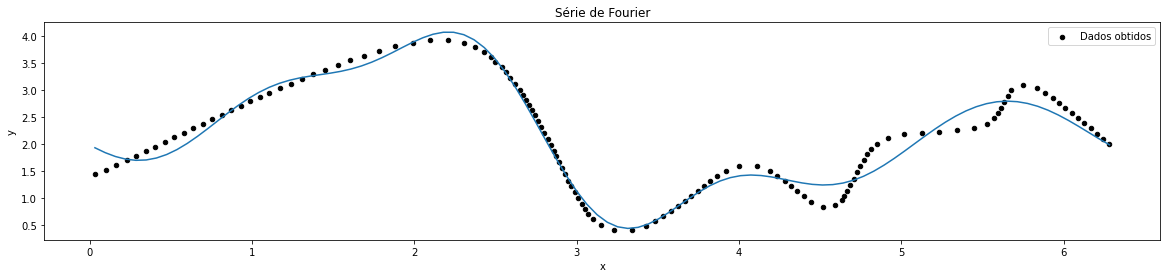

In [11]:
fig = plt.figure(figsize=(20,4))
ax1 = fig.add_subplot(111)

b_i = solucao_integral(df, ORDEM)
xr2, yr2 = plot_fourier(df, b_i, ORDEM)
            
plt.plot(xr2, yr2)
df.plot('x','y',legend=True, label = "Dados obtidos", ax=ax1, kind = 'scatter', color = 'black') # Plotando os dados
plt.title('Série de Fourier') # Definindo título do gráfico
plt.xlabel('x') # Definindo legendas dos eixos
plt.ylabel('y')
plt.show() # Plotando o diagrama de fases da mistura escolhida (etanol + água)

## GIF

In [12]:
ordem = 10

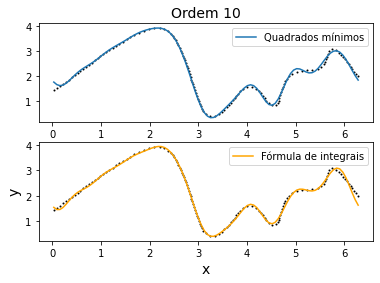

In [13]:
x_df = list(df['x'].values)
y_df = list(df['y'].values)

b_qm = coefs_qm(df, ordem)
xr1, yr1 = plot_fourier(df, b_qm, ordem)

b_i = solucao_integral(df, ordem)
xr2, yr2 = plot_fourier(df, b_i, ordem)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 1)

plt.ylabel('y', fontsize = 14)
    
# For Sine Function
axis[0].scatter(x_df, y_df, s=1, c='black')
axis[0].plot(xr1, yr1, label = 'Quadrados mínimos')
axis[0].set_title(f'Ordem {ordem}',
          fontsize=14)

# Creating legend
axis[0].legend()
    
# For Cosine Function
axis[1].scatter(x_df, y_df, s=1, c='black')
axis[1].plot(xr2, yr2, c = 'orange', label = 'Fórmula de integrais')

# Creating legend
axis[1].legend()

plt.xlabel('x', fontsize = 14)
  
# Combine all the operations and display
plt.show()

In [14]:
def create_frame(df, ordem):
    
    x_df = list(df['x'].values)
    y_df = list(df['y'].values)
    
    b_qm = coefs_qm(df, ordem)
    xr1, yr1 = plot_fourier(df, b_qm, ordem)
    
    b_i = solucao_integral(df, ordem)
    xr2, yr2 = plot_fourier(df, b_i, ordem)
    
    # Initialise the subplot function using number of rows and columns
    figure, axis = plt.subplots(2, 1)
      
    # For Sine Function
    axis[0].scatter(x_df, y_df, s=1, c='black')
    axis[0].plot(xr1, yr1, label = 'Quadrados mínimos')
    axis[0].set_title(f'Ordem {ordem}',
              fontsize=14)
    
    # Creating legend
    axis[0].legend()
      
    # For Cosine Function
    axis[1].scatter(x_df, y_df, s=1, c='black')
    axis[1].plot(xr2, yr2, c = 'orange', label = 'Fórmula de integrais')
    
    # Creating legend
    axis[1].legend()
    
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    plt.savefig(f'./GIF - Fourier - Imagens/Ordem {ordem}.png', 
                transparent = False,  
                facecolor = 'white'
               )
    plt.close()

In [15]:
ordens = range(1, 50)
for ordem in ordens:
    create_frame(df, ordem)

In [16]:
frames = []
for ordem in ordens:
    image = imageio.imread(f'./GIF - Fourier - Imagens/Ordem {ordem}.png')
    frames.append(image)

In [17]:
imageio.mimsave('./Polinômio de Fourier.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second